## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.468448  1.668201  1.189532  1.539458 -0.629761  1.788810
1 -0.031242  0.426816 -0.079976 -1.045778  0.428157 -0.127571
2 -1.357710  0.105042  1.704758 -0.664363 -0.327523 -0.526469
3 -0.296641  0.743131  0.242671  0.826529 -0.742255  0.706876
4  1.392495  0.851122 -0.299676 -0.815230  0.090416 -0.117275


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9674323	total: 55.6ms	remaining: 55.6s
1:	learn: 0.9583402	total: 56.3ms	remaining: 28.1s
2:	learn: 0.9500515	total: 57ms	remaining: 18.9s
3:	learn: 0.9406222	total: 57.4ms	remaining: 14.3s
4:	learn: 0.9324990	total: 57.9ms	remaining: 11.5s
5:	learn: 0.9246993	total: 58.4ms	remaining: 9.67s
6:	learn: 0.9151579	total: 58.9ms	remaining: 8.35s
7:	learn: 0.9074352	total: 59.3ms	remaining: 7.35s
8:	learn: 0.8998930	total: 59.7ms	remaining: 6.58s
9:	learn: 0.8918942	total: 60.3ms	remaining: 5.97s
10:	learn: 0.8842986	total: 60.8ms	remaining: 5.47s
11:	learn: 0.8763793	total: 61.2ms	remaining: 5.04s
12:	learn: 0.8685281	total: 61.8ms	remaining: 4.69s
13:	learn: 0.8603125	total: 62.2ms	remaining: 4.38s
14:	learn: 0.8538617	total: 62.7ms	remaining: 4.12s
15:	learn: 0.8459836	total: 63.1ms	remaining: 3.88s
16:	learn: 0.8383677	total: 63.6ms	remaining: 3.68s
17:	learn: 0.8308588	total: 64.2ms	remaining: 3.5s
18:	learn: 0.8237563	total: 64.6ms	remaining: 3

110:	learn: 0.4038654	total: 107ms	remaining: 860ms
111:	learn: 0.4011636	total: 108ms	remaining: 856ms
112:	learn: 0.3985126	total: 108ms	remaining: 851ms
113:	learn: 0.3958754	total: 109ms	remaining: 845ms
114:	learn: 0.3927829	total: 109ms	remaining: 840ms
115:	learn: 0.3902428	total: 110ms	remaining: 835ms
116:	learn: 0.3876864	total: 110ms	remaining: 830ms
117:	learn: 0.3853472	total: 111ms	remaining: 832ms
118:	learn: 0.3827456	total: 112ms	remaining: 828ms
119:	learn: 0.3807387	total: 112ms	remaining: 823ms
120:	learn: 0.3776985	total: 113ms	remaining: 819ms
121:	learn: 0.3752934	total: 113ms	remaining: 813ms
122:	learn: 0.3721423	total: 114ms	remaining: 810ms
123:	learn: 0.3696761	total: 114ms	remaining: 805ms
124:	learn: 0.3668786	total: 114ms	remaining: 801ms
125:	learn: 0.3647820	total: 115ms	remaining: 796ms
126:	learn: 0.3622471	total: 115ms	remaining: 792ms
127:	learn: 0.3600648	total: 116ms	remaining: 788ms
128:	learn: 0.3581411	total: 116ms	remaining: 785ms
129:	learn: 

281:	learn: 0.1330755	total: 187ms	remaining: 476ms
282:	learn: 0.1324874	total: 188ms	remaining: 475ms
283:	learn: 0.1317168	total: 188ms	remaining: 474ms
284:	learn: 0.1309299	total: 188ms	remaining: 473ms
285:	learn: 0.1300669	total: 189ms	remaining: 472ms
286:	learn: 0.1294087	total: 190ms	remaining: 471ms
287:	learn: 0.1285064	total: 190ms	remaining: 470ms
288:	learn: 0.1276663	total: 190ms	remaining: 468ms
289:	learn: 0.1269787	total: 191ms	remaining: 468ms
290:	learn: 0.1263273	total: 192ms	remaining: 467ms
291:	learn: 0.1255733	total: 192ms	remaining: 465ms
292:	learn: 0.1246560	total: 192ms	remaining: 464ms
293:	learn: 0.1239824	total: 193ms	remaining: 463ms
294:	learn: 0.1232263	total: 193ms	remaining: 462ms
295:	learn: 0.1224864	total: 194ms	remaining: 461ms
296:	learn: 0.1219109	total: 194ms	remaining: 459ms
297:	learn: 0.1212176	total: 195ms	remaining: 458ms
298:	learn: 0.1205814	total: 195ms	remaining: 457ms
299:	learn: 0.1198486	total: 196ms	remaining: 456ms
300:	learn: 

494:	learn: 0.0422554	total: 290ms	remaining: 296ms
495:	learn: 0.0420032	total: 291ms	remaining: 296ms
496:	learn: 0.0417905	total: 292ms	remaining: 295ms
497:	learn: 0.0416239	total: 292ms	remaining: 295ms
498:	learn: 0.0413787	total: 293ms	remaining: 294ms
499:	learn: 0.0412262	total: 293ms	remaining: 293ms
500:	learn: 0.0410803	total: 294ms	remaining: 292ms
501:	learn: 0.0408865	total: 294ms	remaining: 292ms
502:	learn: 0.0405927	total: 294ms	remaining: 291ms
503:	learn: 0.0404161	total: 295ms	remaining: 290ms
504:	learn: 0.0402056	total: 295ms	remaining: 290ms
505:	learn: 0.0400426	total: 296ms	remaining: 289ms
506:	learn: 0.0398724	total: 296ms	remaining: 288ms
507:	learn: 0.0396419	total: 297ms	remaining: 287ms
508:	learn: 0.0394488	total: 297ms	remaining: 287ms
509:	learn: 0.0392821	total: 298ms	remaining: 286ms
510:	learn: 0.0390926	total: 298ms	remaining: 285ms
511:	learn: 0.0389312	total: 298ms	remaining: 284ms
512:	learn: 0.0386862	total: 299ms	remaining: 284ms
513:	learn: 

659:	learn: 0.0193041	total: 370ms	remaining: 191ms
660:	learn: 0.0192334	total: 371ms	remaining: 190ms
661:	learn: 0.0191907	total: 371ms	remaining: 190ms
662:	learn: 0.0191486	total: 372ms	remaining: 189ms
663:	learn: 0.0191106	total: 372ms	remaining: 188ms
664:	learn: 0.0190692	total: 373ms	remaining: 188ms
665:	learn: 0.0190285	total: 373ms	remaining: 187ms
666:	learn: 0.0189546	total: 374ms	remaining: 187ms
667:	learn: 0.0188993	total: 375ms	remaining: 186ms
668:	learn: 0.0188591	total: 375ms	remaining: 186ms
669:	learn: 0.0187870	total: 376ms	remaining: 185ms
670:	learn: 0.0187502	total: 376ms	remaining: 184ms
671:	learn: 0.0187109	total: 376ms	remaining: 184ms
672:	learn: 0.0186654	total: 377ms	remaining: 183ms
673:	learn: 0.0185953	total: 377ms	remaining: 182ms
674:	learn: 0.0185578	total: 378ms	remaining: 182ms
675:	learn: 0.0185060	total: 378ms	remaining: 181ms
676:	learn: 0.0183957	total: 378ms	remaining: 181ms
677:	learn: 0.0183601	total: 379ms	remaining: 180ms
678:	learn: 

870:	learn: 0.0094083	total: 474ms	remaining: 70.1ms
871:	learn: 0.0093858	total: 474ms	remaining: 69.6ms
872:	learn: 0.0093362	total: 475ms	remaining: 69.1ms
873:	learn: 0.0092964	total: 476ms	remaining: 68.6ms
874:	learn: 0.0092684	total: 476ms	remaining: 68ms
875:	learn: 0.0092410	total: 476ms	remaining: 67.4ms
876:	learn: 0.0091963	total: 477ms	remaining: 66.9ms
877:	learn: 0.0091740	total: 478ms	remaining: 66.4ms
878:	learn: 0.0091413	total: 478ms	remaining: 65.8ms
879:	learn: 0.0090978	total: 479ms	remaining: 65.3ms
880:	learn: 0.0090762	total: 479ms	remaining: 64.7ms
881:	learn: 0.0090497	total: 479ms	remaining: 64.1ms
882:	learn: 0.0090076	total: 480ms	remaining: 63.6ms
883:	learn: 0.0089864	total: 480ms	remaining: 63ms
884:	learn: 0.0089606	total: 481ms	remaining: 62.5ms
885:	learn: 0.0089042	total: 481ms	remaining: 61.9ms
886:	learn: 0.0088837	total: 482ms	remaining: 61.4ms
887:	learn: 0.0088366	total: 482ms	remaining: 60.8ms
888:	learn: 0.0087910	total: 483ms	remaining: 60.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

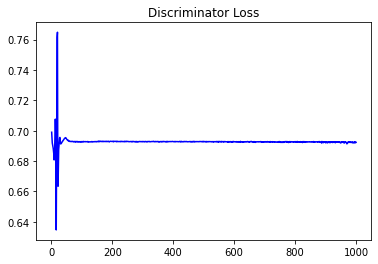

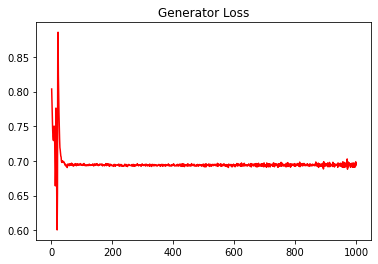

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19347145397962073


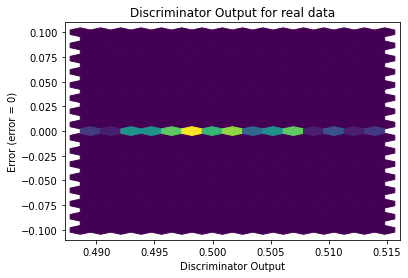

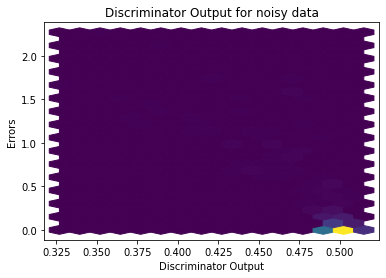

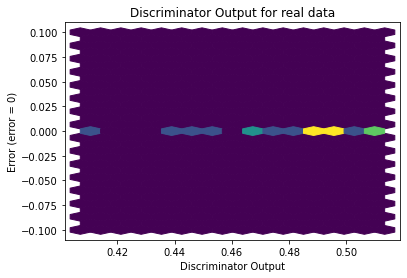

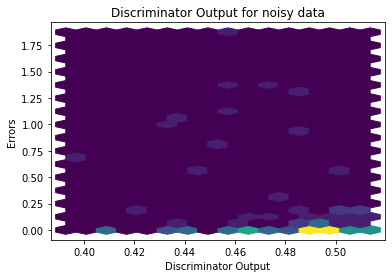

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


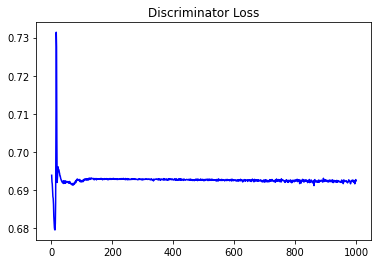

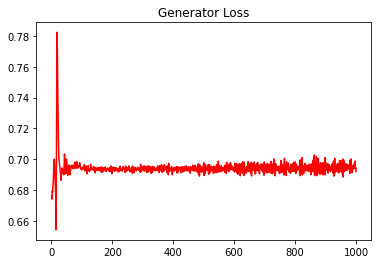

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20479923256437726


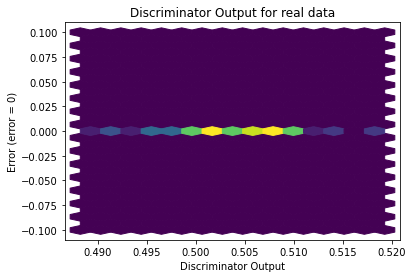

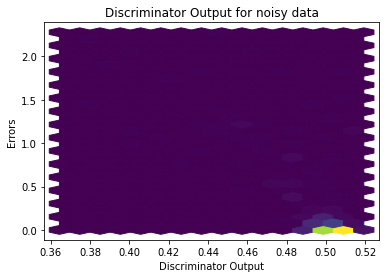

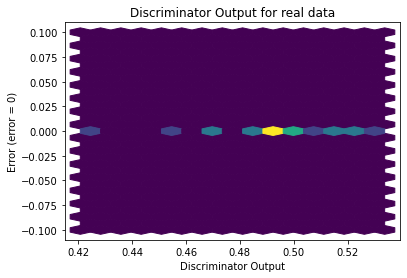

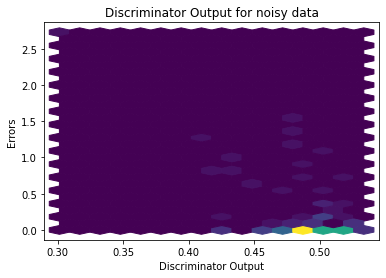

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7188]], requires_grad=True)
